# Fig 4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
#lineage_path = "../data/20231010_adk_lineage_temp.csv"
one_hot_embedding_path = "../data/20240812_175_org_one_hot.csv"
#full_msa_fasta_path = "../data/20240201_all_adk_representative_seqs_aligned.fasta"
data_csv = "../data/adk_ortholog_dataset_km_filtered.csv"
esm_650M_layer_33_path = "../data/20240201_adk_esm_650M_layer33_updated.csv"


### Read in Dataset with Lid and Temp Metadata

In [4]:
lidtype_temp = pd.read_csv("../data/20240812_adk_msa_temp.csv", index_col=0)

In [5]:
dataset = pd.read_csv(data_csv)

In [6]:
lidtype_activity_temp = dataset[["org_name", "kcat_mean_normed", "Km_mean_filtered"]].merge(lidtype_temp, on="org_name")
lidtype_activity_temp["kcat_km"] = lidtype_activity_temp["kcat_mean_normed"] / (lidtype_activity_temp["Km_mean_filtered"] * 1e-6)

In [7]:
lidtype_activity_temp

,org_name,kcat_mean_normed,Km_mean_filtered,0,1,2,3,4,5,6,...,494,495,496,497,498,c4_motif,temperature,lid_type,org_in_first_lib,kcat_km
0,rubrobacter_radiotolerans,8.623056,35.127061,-,-,-,-,-,-,-,...,-,-,-,-,-,ST-D,37,other,True,245481.860096
1,porphyromonas_macacae,42.406030,50.161771,-,-,-,-,-,-,-,...,-,-,-,-,-,I---,37,lidless,True,845385.418817
2,thermomicrobium_roseum,11.769141,74.569592,-,-,-,-,-,-,-,...,-,-,-,-,-,CCCC,70,zinc-like,True,157827.620307
3,synechococcus_elongatus,14.742521,79.398441,-,-,-,-,-,-,-,...,-,-,-,-,-,----,24,lidless,True,185677.717580
4,cellvibrio_japonicus,18.405071,93.677974,-,-,-,-,-,-,-,...,-,-,-,-,-,HSDT,37,hbond_like,True,196471.706160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,thermodesulfatator_atlanticus,340.635358,1758.289860,-,-,-,-,-,-,-,...,-,-,-,-,-,CCCC,70,zinc-like,True,193731.059565
171,thermodesulfobacterium_commune,294.574930,1781.817010,-,-,-,-,-,-,-,...,-,-,-,-,-,CCCC,70,zinc-like,True,165322.773521
172,pyrococcus_furiosus,57.312377,1804.586180,-,-,-,-,-,-,-,...,-,-,-,-,-,CCCC,96,zinc-like,True,31759.290393
173,thermodesulfovibrio_yellowstonii,479.135771,1880.392250,-,-,-,-,-,-,-,...,-,-,-,-,-,CCCC,60,zinc-like,True,254806.289060


# kcat by lidtype

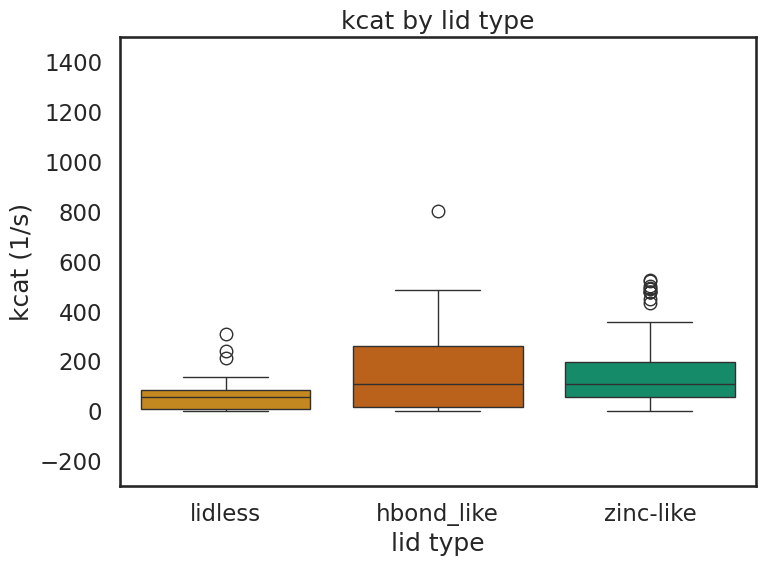

In [8]:
# boxplot kcat by lid type
sns.set_context("talk")
sns.set_style("white")
sns.set_palette("colorblind")
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=lidtype_activity_temp[~lidtype_activity_temp["kcat_mean_normed"].isna()], x="lid_type", y="kcat_mean_normed", hue="lid_type", ax=ax,  order=["lidless", "hbond_like", "zinc-like"])
ax.set_xlabel("lid type")
ax.set_ylabel("kcat (1/s)")
ax.set_title("kcat by lid type")
ax.set_ylim(-300, 1500)
plt.tight_layout()

plt.rcParams['pdf.fonttype'] = 42
#plt.savefig("../data/fig_pdfs/kcat_lid_type_box.pdf")

In [9]:
lidless_kcat = lidtype_activity_temp[lidtype_activity_temp["lid_type"] == "lidless"]["kcat_mean_normed"]
hbond_like_kcat = lidtype_activity_temp[lidtype_activity_temp["lid_type"] == "hbond_like"]["kcat_mean_normed"]
zinc_like_kcat = lidtype_activity_temp[lidtype_activity_temp["lid_type"] == "zinc-like"]["kcat_mean_normed"]

In [18]:
# run shapiro-wilk test for normality
print("Shapiro-Wilk test")
print("lidless")
print(stats.shapiro(lidless_kcat))
print("hbond-like")
print(stats.shapiro(hbond_like_kcat))
print("zinc-like")
print(stats.shapiro(zinc_like_kcat))
# run levene test for homogeneity of variance
print("\nlevene test")
print(stats.levene(lidless_kcat, hbond_like_kcat, zinc_like_kcat))
# run anova
print("\nanova")
print(stats.f_oneway(lidless_kcat, hbond_like_kcat, zinc_like_kcat))
# run tukey hsd
print("\ntukey hsd")
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(lidtype_activity_temp[~lidtype_activity_temp["kcat_mean_normed"].isna() & (lidtype_activity_temp["lid_type"] != "other")]["kcat_mean_normed"], lidtype_activity_temp[~lidtype_activity_temp["kcat_mean_normed"].isna() & (lidtype_activity_temp["lid_type"]!= "other")]["lid_type"])
result = mc.tukeyhsd()
print(result)
print(mc.groupsunique)



Shapiro-Wilk test
lidless
ShapiroResult(statistic=0.8261415362358093, pvalue=1.3821004358760547e-05)
hbond-like
ShapiroResult(statistic=0.8291516304016113, pvalue=4.346295099821873e-05)
zinc-like
ShapiroResult(statistic=0.8289824724197388, pvalue=7.148163838621713e-09)

levene test
LeveneResult(statistic=6.437821120248443, pvalue=0.0020205886861791545)

anova
F_onewayResult(statistic=6.9188384129867995, pvalue=0.0012938244733108274)

tukey hsd
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1     group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------------
hbond_like   lidless -94.5895 0.0065 -166.8655 -22.3135   True
hbond_like zinc-like  -6.9219 0.9631  -69.6208   55.777  False
   lidless zinc-like  87.6676  0.002   27.5952   147.74   True
--------------------------------------------------------------
['hbond_like' 'lidless' 'zinc-like']


### First Libary Temperature by Lidtype

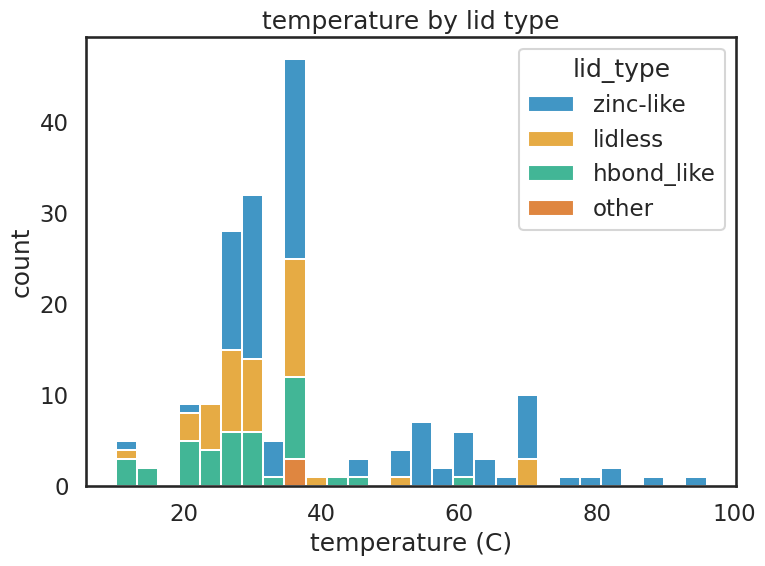

In [8]:
# histogram tempeature by lid type for first lib
sns.set_context("talk")
sns.set_style("white")
sns.set_palette("colorblind")
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=lidtype_activity_temp[lidtype_activity_temp["org_in_first_lib"]], x="temperature", hue="lid_type", multiple="stack", ax=ax)
ax.set_xlabel("temperature (C)")
ax.set_ylabel("count")
ax.set_title("temperature by lid type")
plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42
#plt.savefig("/Users/duncanmuir/Downloads/temp_lid_hist.pdf")

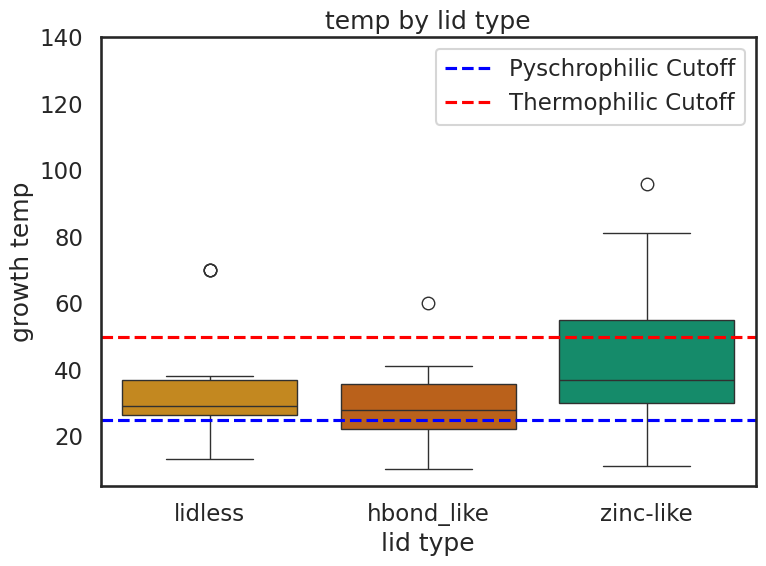

In [46]:
# boxplot kcat by lid type
sns.set_context("talk")
sns.set_style("white")
sns.set_palette("colorblind")
fig, ax = plt.subplots(figsize=(8, 6))
# order violinplot lidless, hbond_like, zinc-like
sns.boxplot(data=lidtype_activity_temp[lidtype_activity_temp["org_in_first_lib"]], x="lid_type", y="temperature", hue="lid_type", ax=ax, order=["lidless", "hbond_like", "zinc-like"])
ax.set_xlabel("lid type")
ax.set_ylabel("growth temp")
ax.set_title("temp by lid type")
ax.set_ylim(5, 140)
ax.axhline(25, color="blue", linestyle="--", label="Pyschrophilic Cutoff")
ax.axhline(50, color="red", linestyle="--", label="Thermophilic Cutoff")
plt.legend()
plt.tight_layout()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig("../data/fig_pdfs/temp_lid_type_box.pdf")

In [19]:
lidless_temp = lidtype_activity_temp[lidtype_activity_temp["lid_type"] == "lidless"]["temperature"]
hbond_like_temp = lidtype_activity_temp[lidtype_activity_temp["lid_type"] == "hbond_like"]["temperature"]
zinc_like_temp = lidtype_activity_temp[lidtype_activity_temp["lid_type"] == "zinc-like"]["temperature"]

In [20]:
# shapiro-wilk test for normality
print("Shapiro-Wilk test")
print("lidless")
print(stats.shapiro(lidless_temp))
print("hbond-like")
print(stats.shapiro(hbond_like_temp))
print("zinc-like")
print(stats.shapiro(zinc_like_temp))
# levene test for homogeneity of variance
print("\nlevene test")
print(stats.levene(lidless_temp, hbond_like_temp, zinc_like_temp))
# anova
print("\nanova")
print(stats.f_oneway(lidless_temp, hbond_like_temp, zinc_like_temp))
# tukey hsd
print("\ntukey hsd")
mc = MultiComparison(lidtype_activity_temp[lidtype_activity_temp["org_in_first_lib"] & (lidtype_activity_temp["lid_type"] != "other")]["temperature"], 
                     lidtype_activity_temp[lidtype_activity_temp["org_in_first_lib"] & (lidtype_activity_temp["lid_type"] != "other")]["lid_type"])
result = mc.tukeyhsd()
print(result)
print(mc.groupsunique)



Shapiro-Wilk test
lidless
ShapiroResult(statistic=0.751702606678009, pvalue=3.8007834746167646e-07)
hbond-like
ShapiroResult(statistic=0.9397128224372864, pvalue=0.041004594415426254)
zinc-like
ShapiroResult(statistic=0.8821680545806885, pvalue=6.244360406526539e-07)

levene test
LeveneResult(statistic=5.698336386519798, pvalue=0.004028249219262673)

anova
F_onewayResult(statistic=16.392656002332334, pvalue=3.113576270378211e-07)

tukey hsd
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2  meandiff p-adj   lower   upper  reject
-----------------------------------------------------------
hbond_like   lidless    4.388 0.3696 -3.2967 12.0727  False
hbond_like zinc-like  14.7368    0.0  8.0704 21.4033   True
   lidless zinc-like  10.3488 0.0005  3.9617  16.736   True
-----------------------------------------------------------
['hbond_like' 'lidless' 'zinc-like']
